# Definitions and imports

In [2]:
import numpy as np
from qutip import * # Quantum Toolbox in Python
from numpy import *

#To create the graph
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
from scipy.optimize import minimize
import scipy.linalg as lnag
from scipy.signal import argrelextrema
import pandas as pd
import os

import scipy.sparse as sp
from scipy.sparse.linalg import expm_multiply

'''Defining parameters to create the graphs in a better style'''
lslist = ['-', (2, (2, 1)), (1, (3, 1, 1, 1)), (0, (3, 1)), (0, (1, 1)),'-', (2, (2, 1)), (1, (3, 1, 1, 1)), (0, (3, 1)), (0, (1, 1))]
markerlist = ["o", "s", "D", "p", "v", "^", "X", "<", ">", "H","o", "s", "D", "p", "v", "^", "X", "<", ">", "H"]
leglist = [ 'N = 2', 'Dyn-1', 'Dyn-2', 'N = 5', 'N = 6', 'N = 7']

AxisParameters = 'width=5, length=10, labelsize=30'
AxisMinorParameters = 'width=1.2, length=4'
#Lines
Labels_FontSize = 20
Box_width = 2
x_interval = 0.5
y_interval = 5.0
decimalFormart = '{x:.2f}'
#Style of the exp data points
DontShow = 0.0
DataPointSize = 9
skip = 8
#Error Bars style
e_line_width = 3
ending_size = 4
#colorList = plt.cm.jet(np.linspace(0,1,len(Power[0])))
ColorsMarkers_lines = [
    ["#08589e", "#478fd3", "#1077ca", "#0c7da0"],  # Azul
    ["#91003f", "#c994c7"],  # Rosa/Roxo
    ["#006600", "#99FF99"],  # Verde
    ["#cc4c02", "#fe9929"],  # Laranja
    ["black", "#E0E0E0"],     # Preto/Cinza
    ["#a50f15", "#fb6a4a"],  # Vermelho
    ["#54278f", "#9e9ac8"],  # Roxo
    ["#0868ac", "#43a2ca"],  # Ciano
    ["#8c510a", "#d8b365"],  # Marrom
    ["#b8860b", "#ffd700"],  # Dourado
    ["#a50f15", "#fb6a4a"],  # Vermelho
    ["#54278f", "#9e9ac8"],  # Roxo
    ["#0868ac", "#43a2ca"],  # Ciano
    ["#8c510a", "#d8b365"],  # Marrom
    ["#b8860b", "#ffd700"]  # Dourado
]
colorList = ['#332288','#117733',  '#E66100',  '#44AA99', '#882255', '#88CCEE',  '#DDCC77', '#CC6677' , '#332288','#117733',  '#AA4499',  '#44AA99', '#882255', '#88CCEE',  '#DDCC77', '#CC6677']
markerSizes = [7,7,7,7]

DataPoints = ["ms=DataPointSize, linewidth=0,markevery=8"]

csfont = {'fontname':'Times New Roman'}

## Definitions

In [3]:
def A(N,D):
    a_list = []
    for n in range(0,N+1):
        a_n =[qeye(D)]*(N+1)
        a_n[n] = destroy(D)
        a_n = tensor(a_n)
        a_list.append(a_n)
    return a_list

def H(g,N,D):
    a = A(N,D)
    H_0 = 0
    for n in range(0,N+1):
        for m in range(0,N+1):
            if n == m:
                H_0 += g[n][n]*a[n].dag()*a[n]
            else:
                H_0 += (g[n][m]/2)*(a[n].dag()+a[n])*(a[m].dag()+a[m]) #Factor 1/2 for symmetrization and double counting
    return H_0



# Examples

In [4]:
N = 2
D_list = [2,4,10,15,20]
Energies = []
for D in D_list:
    g_coup = np.zeros([N+1,N+1])
    for n in range(0,N+1):
        g_coup[n][n] = 1.0
        if n > 0:
            g_coup[0][n] = 1
            g_coup[n][0] = 1


    energies = np.diag(np.diag(g_coup))
    H_ref = H(energies,N,D)
    H_battery = H(g_coup,N,D)
    times = np.linspace(0,5,500)


    ψ0 = tensor([basis(D,0)]*(N+1))
    ψ_t = sesolve(H_battery,ψ0,times, e_ops= [H_ref])
    Energies.append(ψ_t.expect[0])

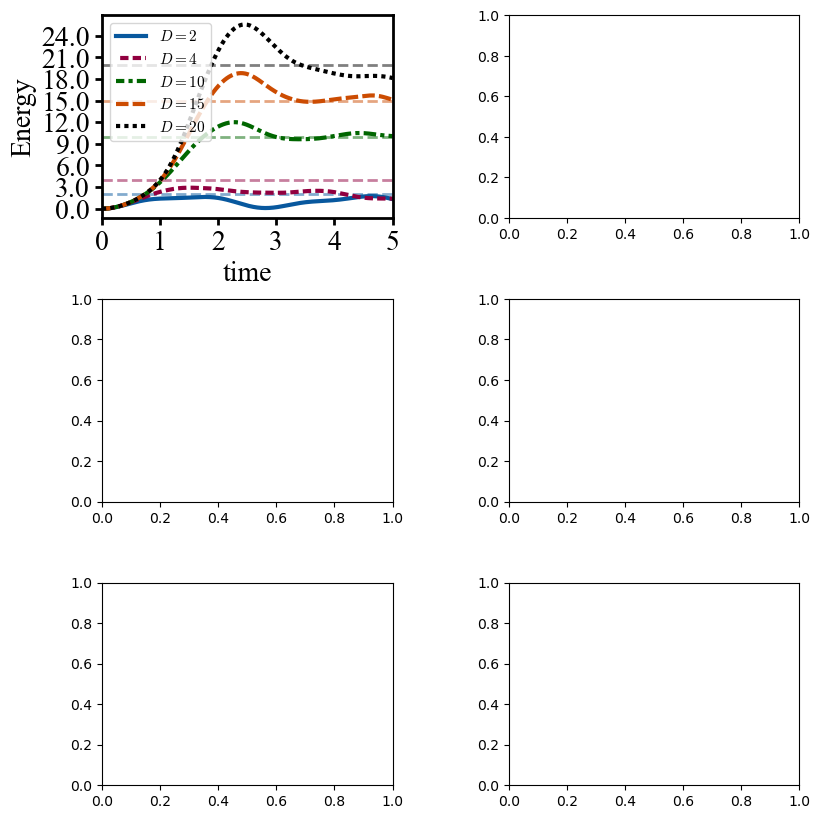

In [5]:
figsize = (9, 10) #5:44
cols = 2
rows = 3
fig, axs = plt.subplots(rows, cols, figsize=figsize)
fig.subplots_adjust(hspace=0.4,wspace=0.4)

import matplotlib.font_manager as font_manager
Legendfont = font_manager.FontProperties(math_fontfamily='cm', size=11)

markerSizes = np.ones(8)*7

l1,l2 = 0,0

for n in range(0,len(D_list)):
    axs[l1][l2].axhline(D_list[n], color = ColorsMarkers_lines[n][0], linestyle='--', linewidth=2, alpha = 0.5)
    axs[l1][l2].plot(times, Energies[n], color = ColorsMarkers_lines[n][0], linestyle=lslist[n], linewidth=3, label = r'$D = %.d$' %(D_list[n]))


for l1 in [0]:
    for l2 in [0]:
        for label in (axs[l1][l2].get_xticklabels() + axs[l1][l2].get_yticklabels()):
            label.set_fontname('Times New Roman')
        axs[l1][l2].legend(prop=Legendfont,loc='best')
        axs[l1][l2].xaxis.set_tick_params(width=Box_width, length=5, labelsize = Labels_FontSize)
        axs[l1][l2].yaxis.set_tick_params(width=Box_width, length=5, labelsize = Labels_FontSize)#, labelcolor= GrColor.GetColorLine('red',1)
        axs[l1][l2].tick_params(axis='y', which='minor', width = Box_width, length=4)
        axs[l1][l2].tick_params(axis='x', which='minor', width = Box_width, length=4)
        axs[l1][l2].xaxis.set_major_formatter('{x:.1f}')
        axs[l1][l2].yaxis.set_major_formatter('{x:.2f}')
        if (l1,l2) in [(0,0),(0,1)]:
            axs[l1][l2].set_ylabel(r"Energy", fontsize = Labels_FontSize,math_fontfamily='cm', **csfont)
            axs[l1][l2].set_xlabel(r"time", fontsize = Labels_FontSize,math_fontfamily='cm', **csfont)
            axs[l1][l2].xaxis.set_major_formatter('{x:.0f}')
            axs[l1][l2].set_xlim( 0, 5)
            #axs[l1][l2].set_ylim( 0, 1.0)
            axs[l1][l2].yaxis.set_major_formatter('{x:.1f}')
            axs[l1][l2].xaxis.set_major_locator(MultipleLocator(1.0))
            axs[l1][l2].yaxis.set_major_locator(MultipleLocator(3.0))
        
        
        plt.setp(axs[l1][l2].spines.values(), linewidth=Box_width)